In [1]:
#import Regression_variables from same directory
from regression_variable_morgan_comparison import *
from sklearn.model_selection import cross_val_score
from optuna.samplers import TPESampler

# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / "data"

# compounds is the name of the data frame

/home/alex/miniforge3/envs/my-rdkit-env-covid/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-07 11:38:12.703611: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-07 11:38:12.832160: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



Assign cluster ID

Assign cluster ID


  0%|          | 0/595 [00:00<?, ?it/s][11:38:32] DEPRECATION WARNING: please use MorganGenerator
[11:38:32] DEPRECATION WARNING: please use MorganGenerator
[11:38:32] DEPRECATION WARNING: please use MorganGenerator
[11:38:32] DEPRECATION WARNING: please use MorganGenerator
[11:38:32] DEPRECATION WARNING: please use MorganGenerator
[11:38:32] DEPRECATION WARNING: please use MorganGenerator
[11:38:32] DEPRECATION WARNING: please use MorganGenerator
[11:38:32] DEPRECATION WARNING: please use MorganGenerator
[11:38:32] DEPRECATION WARNING: please use MorganGenerator
[11:38:32] DEPRECATION WARNING: please use MorganGenerator
[11:38:32] DEPRECATION WARNING: please use MorganGenerator
[11:38:32] DEPRECATION WARNING: please use MorganGenerator
[11:38:32] DEPRECATION WARNING: please use MorganGenerator
[11:38:32] DEPRECATION WARNING: please use MorganGenerator
[11:38:32] DEPRECATION WARNING: please use MorganGenerator
[11:38:32] DEPRECATION WARNING: please use MorganGenerator
[11:38:32] DEPREC

# Comparing maccs vs morgan2 as our compound representation #

### Using Maccs ###

In [2]:
rfr_rand = RandomForestRegressor(random_state=SEED)
rfr_strat = RandomForestRegressor(random_state=SEED)
rfr_hi = RandomForestRegressor(random_state=SEED)
rfr_noise = RandomForestRegressor(random_state=SEED)
rfr_fur = RandomForestRegressor(random_state=SEED)

rfr_rand.fit(np.array(list((x_train_rand))).astype(float), y_train_rand)
rfr_strat.fit(np.array(list((x_train_strat))).astype(float), y_train_strat)
rfr_hi.fit(np.array(list((x_train_hi))).astype(float), y_train_hi)
rfr_noise.fit(np.array(list((x_train_noise))).astype(float), y_train_noise)
rfr_fur.fit(np.array(list((x_train_fur))).astype(float), y_train_fur)

y_pred_rfr_rand = rfr_rand.predict(np.array(list((x_test_rand))).astype(float))
y_pred_rfr_strat = rfr_strat.predict(np.array(list((x_test_strat))).astype(float))
y_pred_rfr_hi = rfr_hi.predict(np.array(list((x_test_hi))).astype(float))
y_pred_rfr_noise = rfr_noise.predict(np.array(list((x_test_noise))).astype(float))
y_pred_rfr_fur = rfr_fur.predict(np.array(list((x_test_fur))).astype(float))

mae_rfr_rand = mean_absolute_error(y_test_rand, y_pred_rfr_rand)
mse_rfr_rand = mean_squared_error(y_test_rand, y_pred_rfr_rand)
r2_rfr_rand = r2_score(y_test_rand, y_pred_rfr_rand)

mae_rfr_strat = mean_absolute_error(y_test_strat, y_pred_rfr_strat)
mse_rfr_strat = mean_squared_error(y_test_strat, y_pred_rfr_strat)
r2_rfr_strat = r2_score(y_test_strat, y_pred_rfr_strat)

mae_rfr_hi = mean_absolute_error(y_test_hi, y_pred_rfr_hi)
mse_rfr_hi = mean_squared_error(y_test_hi, y_pred_rfr_hi)
r2_rfr_hi = r2_score(y_test_hi, y_pred_rfr_hi)

mae_rfr_noise = mean_absolute_error(y_test_noise, y_pred_rfr_noise)
mse_rfr_noise = mean_squared_error(y_test_noise, y_pred_rfr_noise)
r2_rfr_noise = r2_score(y_test_noise, y_pred_rfr_noise)

mae_rfr_fur = mean_absolute_error(y_test_fur, y_pred_rfr_fur)
mse_rfr_fur = mean_squared_error(y_test_fur, y_pred_rfr_fur)
r2_rfr_fur = r2_score(y_test_fur, y_pred_rfr_fur)

### Using morgan2 ###

In [3]:
rfr_rand_m2 = RandomForestRegressor(random_state=SEED)
rfr_strat_m2 = RandomForestRegressor(random_state=SEED)
rfr_hi_m2 = RandomForestRegressor(random_state=SEED)
rfr_noise_m2 = RandomForestRegressor(random_state=SEED)
rfr_fur_m2 = RandomForestRegressor(random_state=SEED)

rfr_rand_m2.fit(np.array(list((x_train_rand_m2))).astype(float), y_train_rand_m2)
rfr_strat_m2.fit(np.array(list((x_train_strat_m2))).astype(float), y_train_strat_m2)
rfr_hi_m2.fit(np.array(list((x_train_hi_m2))).astype(float), y_train_hi_m2)
rfr_noise_m2.fit(np.array(list((x_train_noise_m2))).astype(float), y_train_noise_m2)
rfr_fur_m2.fit(np.array(list((x_train_fur_m2))).astype(float), y_train_fur_m2)

y_pred_rfr_rand_m2 = rfr_rand_m2.predict(np.array(list((x_test_rand_m2))).astype(float))
y_pred_rfr_strat_m2 = rfr_strat_m2.predict(np.array(list((x_test_strat_m2))).astype(float))
y_pred_rfr_hi_m2 = rfr_hi_m2.predict(np.array(list((x_test_hi_m2))).astype(float))
y_pred_rfr_noise_m2 = rfr_noise_m2.predict(np.array(list((x_test_noise_m2))).astype(float))
y_pred_rfr_fur_m2 = rfr_fur_m2.predict(np.array(list((x_test_fur_m2))).astype(float))

mae_rfr_rand_m2 = mean_absolute_error(y_test_rand_m2, y_pred_rfr_rand_m2)
mse_rfr_rand_m2 = mean_squared_error(y_test_rand_m2, y_pred_rfr_rand_m2)
r2_rfr_rand_m2 = r2_score(y_test_rand_m2, y_pred_rfr_rand_m2)

mae_rfr_strat_m2 = mean_absolute_error(y_test_strat_m2, y_pred_rfr_strat_m2)
mse_rfr_strat_m2 = mean_squared_error(y_test_strat_m2, y_pred_rfr_strat_m2)
r2_rfr_strat_m2 = r2_score(y_test_strat_m2, y_pred_rfr_strat_m2)

mae_rfr_hi_m2 = mean_absolute_error(y_test_hi_m2, y_pred_rfr_hi_m2)
mse_rfr_hi_m2 = mean_squared_error(y_test_hi_m2, y_pred_rfr_hi_m2)
r2_rfr_hi_m2 = r2_score(y_test_hi_m2, y_pred_rfr_hi_m2)

mae_rfr_noise_m2 = mean_absolute_error(y_test_noise_m2, y_pred_rfr_noise_m2)
mse_rfr_noise_m2 = mean_squared_error(y_test_noise_m2, y_pred_rfr_noise_m2)
r2_rfr_noise_m2 = r2_score(y_test_noise_m2, y_pred_rfr_noise_m2)

mae_rfr_fur_m2 = mean_absolute_error(y_test_fur_m2, y_pred_rfr_fur_m2)
mse_rfr_fur_m2 = mean_squared_error(y_test_fur_m2, y_pred_rfr_fur_m2)
r2_rfr_fur_m2 = r2_score(y_test_fur_m2, y_pred_rfr_fur_m2)

In [4]:
#Create a table that shows the performance of the random forest regressor on the different splits displaying mae, mse and r2 values
#display and save variable values to 3sf

split_scores_rfr_initial_maccs_vs_morgan2 = {'Split': ['Random', 'Stratified pIC50', 'Hierarchical Clustering', 'UMAP Noise', 'UMAP Furthest Cluster'],
        'maccs MAE': [mae_rfr_rand, mae_rfr_strat, mae_rfr_hi, mae_rfr_noise, mae_rfr_fur],
        'maccs MSE': [mse_rfr_rand, mse_rfr_strat, mse_rfr_hi, mse_rfr_noise, mse_rfr_fur],
        'maccs R2': [r2_rfr_rand, r2_rfr_strat, r2_rfr_hi, r2_rfr_noise, r2_rfr_fur],
        'morgan2 MAE': [mae_rfr_rand_m2, mae_rfr_strat_m2, mae_rfr_hi_m2, mae_rfr_noise_m2, mae_rfr_fur_m2],
        'morgan2 MSE': [mse_rfr_rand_m2, mse_rfr_strat_m2, mse_rfr_hi_m2, mse_rfr_noise_m2, mse_rfr_fur_m2],
        'morgan2 R2': [r2_rfr_rand_m2, r2_rfr_strat_m2, r2_rfr_hi_m2, r2_rfr_noise_m2, r2_rfr_fur_m2]}

split_scores_rfr_initial_maccs_vs_morgan2_df = pd.DataFrame(split_scores_rfr_initial_maccs_vs_morgan2)
split_scores_rfr_initial_maccs_vs_morgan2_df.set_index("Split", inplace=True)
# Round the values to 3 significant figures
split_scores_rfr_initial_maccs_vs_morgan2_df = split_scores_rfr_initial_maccs_vs_morgan2_df.applymap(lambda x: round(x, 3))
#save df to csv in data file
split_scores_rfr_initial_maccs_vs_morgan2_df.to_csv(DATA / "split_scores_rfr_initial_maccs_vs_morgan2.csv")
print(split_scores_rfr_initial_maccs_vs_morgan2_df)

                         maccs MAE  maccs MSE  maccs R2  morgan2 MAE  \
Split                                                                  
Random                       0.383      0.309     0.580        0.328   
Stratified pIC50             0.462      0.423     0.517        0.320   
Hierarchical Clustering      0.675      0.705     0.324        0.650   
UMAP Noise                   0.729      0.822     0.195        0.559   
UMAP Furthest Cluster        0.855      1.036     0.179        0.678   

                         morgan2 MSE  morgan2 R2  
Split                                             
Random                         0.252       0.657  
Stratified pIC50               0.247       0.706  
Hierarchical Clustering        0.835       0.200  
UMAP Noise                     0.591       0.389  
UMAP Furthest Cluster          0.811       0.351  


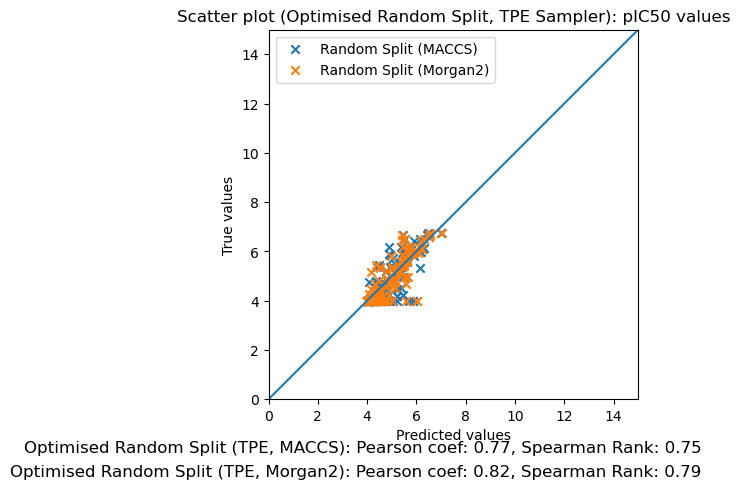

In [5]:
# Scatter plot
limits = 0, 15
fig, ax = plt.subplots()
ax.scatter(y_pred_rfr_rand, y_test_rand, marker="x", label="Random Split (MACCS)")
ax.scatter(y_pred_rfr_rand_m2, y_test_rand_m2, marker="x", label="Random Split (Morgan2)")
lin = np.linspace(*limits, 100)
ax.plot(lin, lin)
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("Predicted values")
ax.set_ylabel("True values")
ax.set_title("Scatter plot (Optimised Random Split, TPE Sampler): pIC50 values")
ax.set_xlim(limits)
ax.set_ylim(limits)

pearsoncoef_rfr_rand_MACCS = np.corrcoef(y_pred_rfr_rand.flatten(), y_test_rand.values.flatten())[0,1]
spearmancoef_rfr_rand_MACCS = spearmanr(y_pred_rfr_rand.flatten(), y_test_rand.values.flatten()).correlation
pearsoncoef_rfr_rand_m2 = np.corrcoef(y_pred_rfr_rand_m2.flatten(), y_test_rand_m2.values.flatten())[0,1]
spearmancoef_rfr_rand_m2 = spearmanr(y_pred_rfr_rand_m2.flatten(), y_test_rand_m2.values.flatten()).correlation
fig.text(0.9, 0, f"Optimised Random Split (TPE, MACCS): Pearson coef: {pearsoncoef_rfr_rand_MACCS:.2f}, Spearman Rank: {spearmancoef_rfr_rand_MACCS:.2f}", horizontalalignment='right', fontsize=12)
fig.text(0.9, -0.05, f"Optimised Random Split (TPE, Morgan2): Pearson coef: {pearsoncoef_rfr_rand_m2:.2f}, Spearman Rank: {spearmancoef_rfr_rand_m2:.2f}", horizontalalignment='right', fontsize=12)

fig.savefig(DATA / "scatter_plot_rfr_rand.png")
ax.legend()
plt.show();

## Hyper-parameter tuning for random split ##

In [6]:
study_name_TPE_m2 = "random_forest_study_TPE_m2_v2"  # Unique identifier of the study
storage_name_TPE_m2 = f"sqlite:///example_TPE_m2.db"  # SQLite database URL

study_rand_TPE_m2 = optuna.create_study(study_name=study_name_TPE_m2, storage=storage_name_TPE_m2, load_if_exists=True)

[I 2024-08-07 11:38:51,014] Using an existing study with name 'random_forest_study_TPE_m2_v2' instead of creating a new one.


In [7]:
def objective(trial, X_train, y_train):
    n_estimators = trial.suggest_int("n_estimators", 50, 750)
    max_depth = trial.suggest_int("max_depth", 4, 8)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)

    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1).mean()
    return score

In [8]:
def save_best_trial(study, trial):
    if study.best_trial == trial:
        print(f"New best trial found: {trial.number}")
        print(f"Value: {trial.value}")
        print(f"Params: {trial.params}")


In [9]:
study_rand_TPE_m2.optimize(lambda trial: objective(trial, np.array(list(x_train_rand_m2)).astype(float), y_train_rand_m2), 
                    n_trials=1500, 
                    show_progress_bar=True, 
                    callbacks=[save_best_trial])

  0%|          | 0/1500 [00:04<?, ?it/s]


[W 2024-08-07 11:38:55,523] Trial 1529 failed with parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/alex/miniforge3/envs/my-rdkit-env-covid/lib/python3.12/site-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/tmp/ipykernel_681301/747805670.py", line 1, in <lambda>
    study_rand_TPE_m2.optimize(lambda trial: objective(trial, np.array(list(x_train_rand_m2)).astype(float), y_train_rand_m2),
                                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_681301/2926771045.py", line 10, in objective
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1).mean()
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

KeyboardInterrupt: 

In [10]:
study_rand_TPE_m2.best_params

{'n_estimators': 62,
 'max_depth': 4,
 'min_samples_split': 8,
 'min_samples_leaf': 10}

In [11]:
best_params_rand_TPE_m2 = study_rand_TPE_m2.best_params

In [12]:
""" best_n_estimators_rand_TPE_m2 = best_params_rand_TPE_m2["n_estimators"]
best_max_depth_rand_TPE_m2 = best_params_rand_TPE_m2["max_depth"]
best_min_samples_split_rand_TPE_m2 = best_params_rand_TPE_m2["min_samples_split"]
best_min_samples_leaf_rand_TPE_m2 = best_params_rand_TPE_m2["min_samples_leaf"] """

best_n_estimators_rand_TPE_m2 = 323
best_max_depth_rand_TPE_m2 = 8
best_min_samples_split_rand_TPE_m2 = 2
best_min_samples_leaf_rand_TPE_m2 = 1

rfr_rand_best_TPE_m2 = RandomForestRegressor(random_state=SEED, n_estimators=best_n_estimators_rand_TPE_m2, max_depth=best_max_depth_rand_TPE_m2, min_samples_split=best_min_samples_split_rand_TPE_m2, min_samples_leaf=best_min_samples_leaf_rand_TPE_m2)
rfr_rand_best_TPE_m2.fit(np.array(list((x_train_rand_m2))).astype(float), y_train_rand_m2)
y_pred_rfr_rand_best_TPE_m2 = rfr_rand_best_TPE_m2.predict(np.array(list((x_test_rand_m2))).astype(float))

mae_rfr_rand_best_TPE_m2 = mean_absolute_error(y_test_rand_m2, y_pred_rfr_rand_best_TPE_m2)
mse_rfr_rand_best_TPE_m2 = mean_squared_error(y_test_rand_m2, y_pred_rfr_rand_best_TPE_m2)
r2_rfr_rand_best_TPE_m2 = r2_score(y_test_rand_m2, y_pred_rfr_rand_best_TPE_m2)

### Define parameters manually from Random_Forest.ipynb from optuna results

In [13]:
# # best_n_estimators_rand_TPE_m2 = best_params_rand_TPE_m2["n_estimators"]
# # best_max_depth_rand_TPE_m2 = best_params_rand_TPE_m2["max_depth"]
# # best_min_samples_split_rand_TPE_m2 = best_params_rand_TPE_m2["min_samples_split"]
# # best_min_samples_leaf_rand_TPE_m2 = best_params_rand_TPE_m2["min_samples_leaf"]

best_n_estimators_rand_TPE_MACCS = 323
best_max_depth_rand_TPE_MACCS = 8
best_min_samples_split_rand_TPE_MACCS = 2
best_min_samples_leaf_rand_TPE_MACCS = 1

rfr_rand_best_TPE_MACCS = RandomForestRegressor(random_state=SEED, n_estimators=best_n_estimators_rand_TPE_MACCS, max_depth=best_max_depth_rand_TPE_MACCS, min_samples_split=best_min_samples_split_rand_TPE_MACCS, min_samples_leaf=best_min_samples_leaf_rand_TPE_MACCS)
rfr_rand_best_TPE_MACCS.fit(np.array(list((x_train_rand))).astype(float), y_train_rand)
y_pred_rfr_rand_best_TPE_MACCS = rfr_rand_best_TPE_MACCS.predict(np.array(list((x_test_rand))).astype(float))

mae_rfr_rand_best_TPE_MACCS = mean_absolute_error(y_test_rand, y_pred_rfr_rand_best_TPE_MACCS)
mse_rfr_rand_best_TPE_MACCS = mean_squared_error(y_test_rand, y_pred_rfr_rand_best_TPE_MACCS)
r2_rfr_rand_best_TPE_MACCS = r2_score(y_test_rand, y_pred_rfr_rand_best_TPE_MACCS)

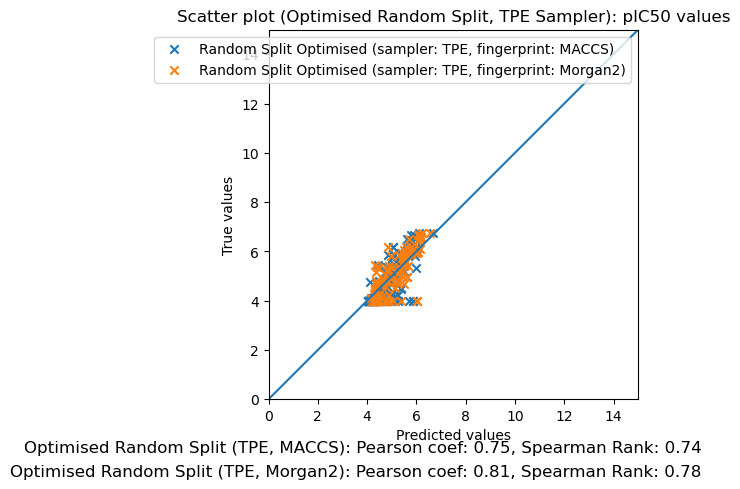

In [14]:
# Scatter plot
limits = 0, 15
fig, ax = plt.subplots()
ax.scatter(y_pred_rfr_rand_best_TPE_MACCS, y_test_rand, marker="x", label="Random Split Optimised (sampler: TPE, fingerprint: MACCS)")
ax.scatter(y_pred_rfr_rand_best_TPE_m2, y_test_rand_m2, marker="x", label="Random Split Optimised (sampler: TPE, fingerprint: Morgan2)")
lin = np.linspace(*limits, 100)
ax.plot(lin, lin)
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("Predicted values")
ax.set_ylabel("True values")
ax.set_title("Scatter plot (Optimised Random Split, TPE Sampler): pIC50 values")
ax.set_xlim(limits)
ax.set_ylim(limits)

pearsoncoef_rfr_rand_best_TPE_MACCS = np.corrcoef(y_pred_rfr_rand_best_TPE_MACCS.flatten(), y_test_rand.values.flatten())[0,1]
spearmancoef_rfr_rand_best_TPE_MACCS = spearmanr(y_pred_rfr_rand_best_TPE_MACCS.flatten(), y_test_rand.values.flatten()).correlation
pearsoncoef_rfr_rand_best_TPE_m2 = np.corrcoef(y_pred_rfr_rand_best_TPE_m2.flatten(), y_test_rand_m2.values.flatten())[0,1]
spearmancoef_rfr_rand_best_TPE_m2 = spearmanr(y_pred_rfr_rand_best_TPE_m2.flatten(), y_test_rand_m2.values.flatten()).correlation
fig.text(0.9, 0, f"Optimised Random Split (TPE, MACCS): Pearson coef: {pearsoncoef_rfr_rand_best_TPE_MACCS:.2f}, Spearman Rank: {spearmancoef_rfr_rand_best_TPE_MACCS:.2f}", horizontalalignment='right', fontsize=12)
fig.text(0.9, -0.05, f"Optimised Random Split (TPE, Morgan2): Pearson coef: {pearsoncoef_rfr_rand_best_TPE_m2:.2f}, Spearman Rank: {spearmancoef_rfr_rand_best_TPE_m2:.2f}", horizontalalignment='right', fontsize=12)

fig.savefig(DATA / "scatter_plot_rfr_TPE_rand.png")
ax.legend()
plt.show();

### Table comparing Maccs and Morgan2, with the best parameters we have found ###

In [15]:
# Create a table comparing MAE, MSE, and R2 for MACCS and Morgan2 fingerprints after TPE fine-tuning
best_maccs_vs_morgan = {'Fingerprint': ['MACCS', 'Morgan2'],
                         'MAE': [mae_rfr_rand_best_TPE_MACCS, mae_rfr_rand_best_TPE_m2],
                         'MSE': [mse_rfr_rand_best_TPE_MACCS, mse_rfr_rand_best_TPE_m2],
                         'R2': [r2_rfr_rand_best_TPE_MACCS, r2_rfr_rand_best_TPE_m2]}

best_maccs_vs_morgan_df = pd.DataFrame(best_maccs_vs_morgan)
best_maccs_vs_morgan_df.set_index("Fingerprint", inplace=True)

# Round the values to 3 significant figures
best_maccs_vs_morgan_df = best_maccs_vs_morgan_df.applymap(lambda x: round(x, 3))
best_maccs_vs_morgan_df.to_csv(DATA / "best_maccs_vs_morgan_df.csv")
best_maccs_vs_morgan_df

,MAE,MSE,R2
Fingerprint,,,
MACCS,0.424,0.326,0.557
Morgan2,0.377,0.264,0.641


In [ ]:
%pip install openpyxl
best_maccs_vs_morgan_df.to_excel(DATA / "best_maccs_vs_morgan_df.xlsx",index=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


So after parameter fine-tuning we are actually gettinmg worse results from morgan2 than MACCS

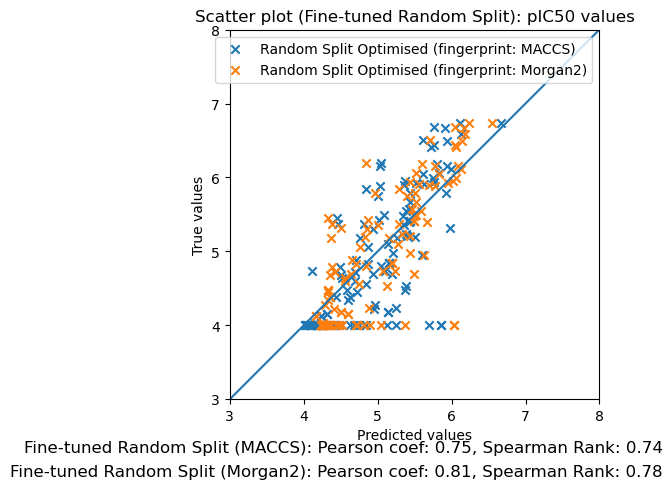

In [ ]:
# Scatter plot
limits = 3, 8
fig, ax = plt.subplots()
ax.scatter(y_pred_rfr_rand_best_TPE_MACCS, y_test_rand, marker="x", label="Random Split Optimised (fingerprint: MACCS)")
ax.scatter(y_pred_rfr_rand_best_TPE_m2, y_test_rand_m2, marker="x", label="Random Split Optimised (fingerprint: Morgan2)")
lin = np.linspace(*limits, 100)
ax.plot(lin, lin)
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("Predicted values")
ax.set_ylabel("True values")
ax.set_title("Scatter plot (Fine-tuned Random Split): pIC50 values")
ax.set_xlim(limits)
ax.set_ylim(limits)

pearsoncoef_rfr_rand_best_TPE_MACCS = np.corrcoef(y_pred_rfr_rand_best_TPE_MACCS.flatten(), y_test_rand.values.flatten())[0,1]
spearmancoef_rfr_rand_best_TPE_MACCS = spearmanr(y_pred_rfr_rand_best_TPE_MACCS.flatten(), y_test_rand.values.flatten()).correlation
pearsoncoef_rfr_rand_best_TPE_m2 = np.corrcoef(y_pred_rfr_rand_best_TPE_m2.flatten(), y_test_rand_m2.values.flatten())[0,1]
spearmancoef_rfr_rand_best_TPE_m2 = spearmanr(y_pred_rfr_rand_best_TPE_m2.flatten(), y_test_rand_m2.values.flatten()).correlation
fig.text(0.9, 0, f"Fine-tuned Random Split (MACCS): Pearson coef: {pearsoncoef_rfr_rand_best_TPE_MACCS:.2f}, Spearman Rank: {spearmancoef_rfr_rand_best_TPE_MACCS:.2f}", horizontalalignment='right', fontsize=12)
fig.text(0.9, -0.05, f"Fine-tuned Random Split (Morgan2): Pearson coef: {pearsoncoef_rfr_rand_best_TPE_m2:.2f}, Spearman Rank: {spearmancoef_rfr_rand_best_TPE_m2:.2f}", horizontalalignment='right', fontsize=12)

fig.savefig(DATA / "best_maccs_vs_morgan2_scatter.png")
ax.legend()
plt.show();